In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
def city_size(x):
    if x < 50000:
        return "rural area"
    elif x < 200000:
        return "small urban area"
    elif x < 500000:
        return "medium-size urban area"
    elif x < 1500000:
        return "metropolitan area"
    else:
        return "large metropolitan areas"
def to_date(x):
    return datetime.strptime(x, "%Y-%m-%d")
def to_date_2(x):
    return datetime.strptime(x, "%m/%d/%y")

In [3]:
df_mobUS = pd.read_csv("counties_with_deaths_and_mobility.csv")
dates_list = list(df_mobUS["date"].apply(lambda x: to_date(x)))[:]

df_mobUS["date"] = dates_list

df_mobUS.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend,deaths,rfgrp,popuni
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1,0.0,59.8,55420.0
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1,0.0,59.8,55420.0
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,0.0,59.8,55420.0
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,55420.0
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,55420.0


# Most affected countries

In [5]:
confirmed = pd.read_csv("covid_confirmed_usafacts.csv")
confirmed['County Name'] = confirmed['County Name'].str.cat(confirmed['State'],sep=", ")
confirmed = confirmed[["countyFIPS", "County Name", "10/30/20"]]
confirmed = confirmed[confirmed["countyFIPS"] != 0]

pop = pd.read_csv("covid_county_population_usafacts.csv")
pop['County Name'] = pop['County Name'].str.cat(pop['State'],sep=", ")
pop = pop[["countyFIPS", "County Name", "population"]]
pop = pop[pop["countyFIPS"] != 0]

cov_ratio = confirmed["10/30/20"] / pop["population"]
cov_ratio = cov_ratio
pop["Confirmed/Total pop"] = cov_ratio
pop = pop[pop["population"] != 0]
print(pop.shape)

def label_cov(x, avg):
    x = x * 100
    if x >= 3 * avg * 100 / 2:
        return "rel high"
    elif x >= avg * 100 / 2:
        return "rel med"
    else:
        return "rel low"

my_data = pop[["County Name", "Confirmed/Total pop", "population"]]
my_data["covid impact"] = list(my_data["Confirmed/Total pop"].apply(lambda x: label_cov(x, my_data["Confirmed/Total pop"].mean())))
print(my_data.shape)

df = df_mobUS.merge(my_data, how = "left", left_on = "sub_region_2", right_on = "County Name")
df = df.drop(["County Name", "popuni"], axis = 1)
print(df.shape)
df.head(5)

(3142, 4)
(3142, 4)
(628564, 18)


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend,deaths,rfgrp,Confirmed/Total pop,population,covid impact
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1,0.0,59.8,0.038322,55869.0,rel med
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1,0.0,59.8,0.038322,55869.0,rel med
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,0.0,59.8,0.038322,55869.0,rel med
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,0.038322,55869.0,rel med
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,0.038322,55869.0,rel med


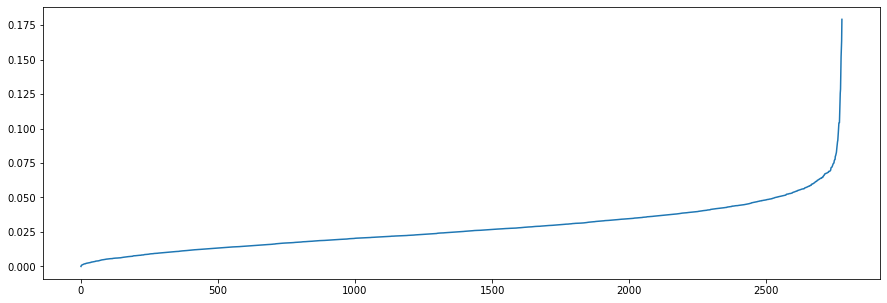

In [6]:
plt.figure(figsize = (15, 5))
plt.plot(df["Confirmed/Total pop"].drop_duplicates().sort_values().values)
plt.show()

In [7]:
size_area = list(df["population"].apply(lambda x: city_size(x)))
df["county size"] = size_area
df.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,date,retail and recreation (%),grocery and pharmacy (%),parks (%),transit stations (%),workplaces (%),residential (%),weekend,deaths,rfgrp,Confirmed/Total pop,population,covid impact,county size
0,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-15,5.0,7.0,NaN,NaN,-4.0,-0.0,1,0.0,59.8,0.038322,55869.0,rel med,small urban area
1,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-16,0.0,1.0,-23.0,NaN,-4.0,-0.0,1,0.0,59.8,0.038322,55869.0,rel med,small urban area
2,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-17,8.0,0.0,NaN,NaN,-27.0,5.0,0,0.0,59.8,0.038322,55869.0,rel med,small urban area
3,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-18,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,0.038322,55869.0,rel med,small urban area
4,US,United States,Alabama,"Autauga County, AL",1001.0,2020-02-19,-2.0,0.0,NaN,NaN,2.0,0.0,0,0.0,59.8,0.038322,55869.0,rel med,small urban area


In [19]:
df.to_csv(r"final_report_data.csv", header = True, index = False)

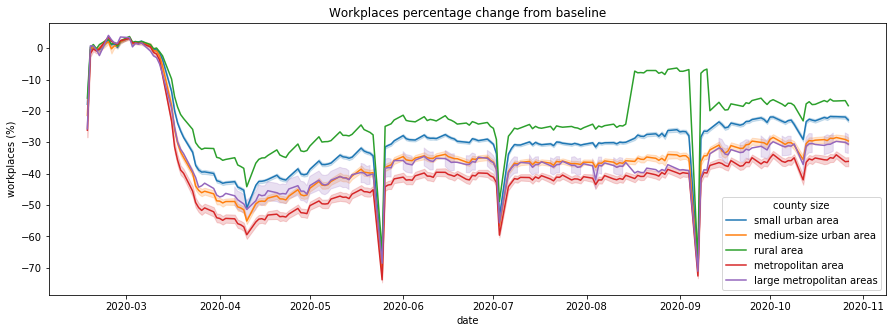

In [8]:
data = df #.loc[selected_index, :]
data = data[data["weekend"] == 0]
plt.figure(figsize = (15, 5))
plt.title("Workplaces percentage change from baseline")
sns.lineplot(data = data, x = "date", y = "workplaces (%)", hue = "county size")
plt.xticks(rotation = 0)
plt.show()

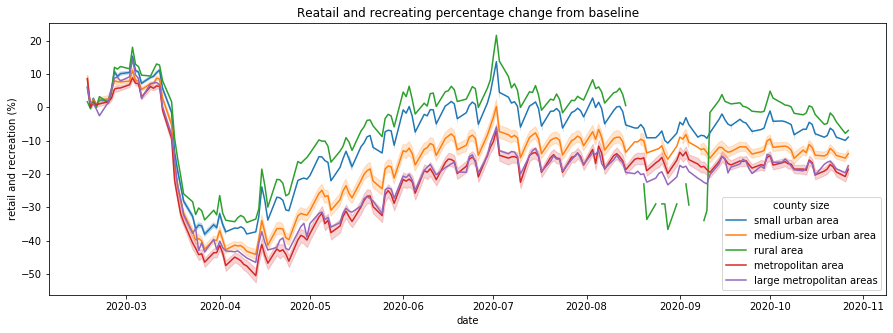

In [9]:
plt.figure(figsize = (15, 5))
plt.title("Reatail and recreating percentage change from baseline")
sns.lineplot(data = data, x = "date", y = "retail and recreation (%)", hue = "county size")
plt.xticks(rotation = 0)
plt.show()

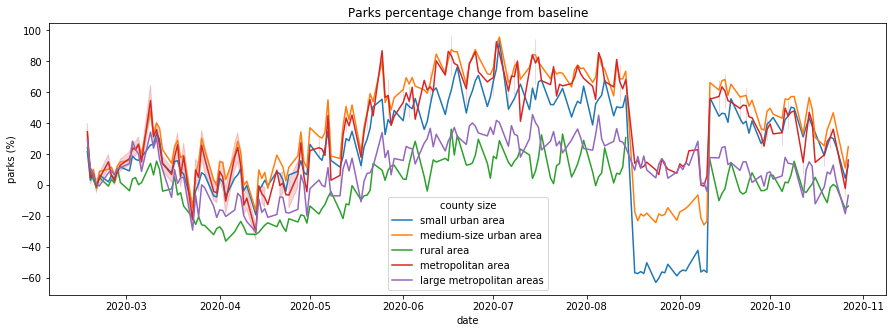

In [10]:
plt.figure(figsize = (15, 5))
plt.title("Parks percentage change from baseline")
sns.lineplot(data = data, x = "date", y = "parks (%)", hue = "county size")
plt.xticks(rotation = 0)
plt.show()

In [11]:
my_data["Confirmed/Total pop"].mean() * 1 / 2

0.013886254012642872

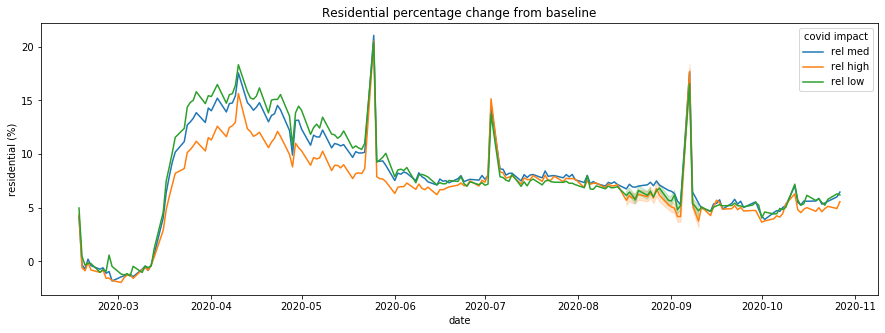

In [12]:
plt.figure(figsize = (15, 5))
plt.title("Residential percentage change from baseline")
sns.lineplot(data = df[df["weekend"] == 0], x = "date", y = "residential (%)", hue = "covid impact")
plt.xticks(rotation = 0)
plt.show()

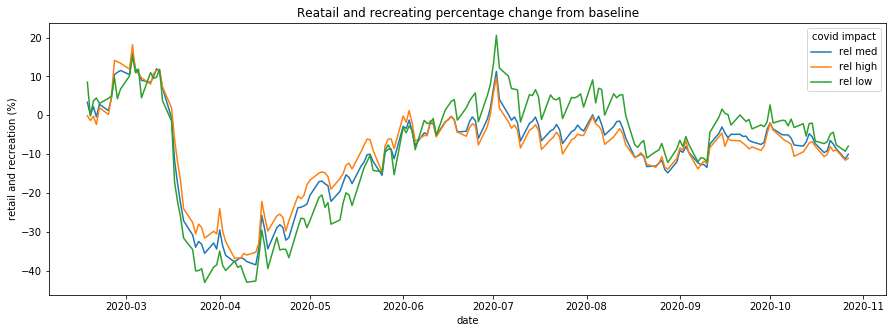

In [13]:
plt.figure(figsize = (15, 5))
plt.title("Reatail and recreating percentage change from baseline")
sns.lineplot(data = df[df["weekend"] == 0], x = "date", y = "retail and recreation (%)", hue = "covid impact")
plt.xticks(rotation = 0)
plt.show()

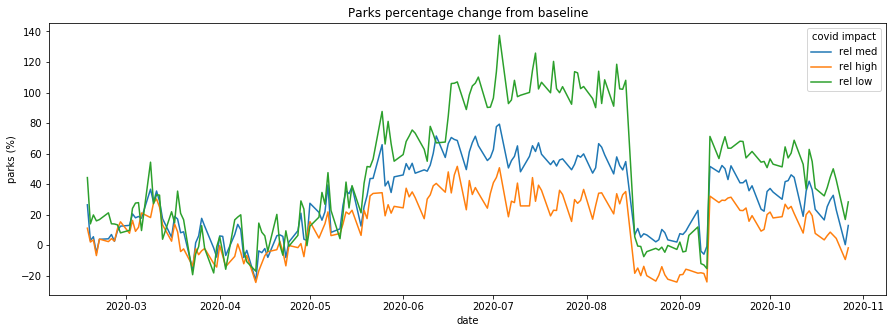

In [14]:
plt.figure(figsize = (15, 5))
plt.title("Parks percentage change from baseline")
sns.lineplot(data = df[df["weekend"] == 0], x = "date", y = "parks (%)", hue = "covid impact")
plt.xticks(rotation = 0)
plt.show()

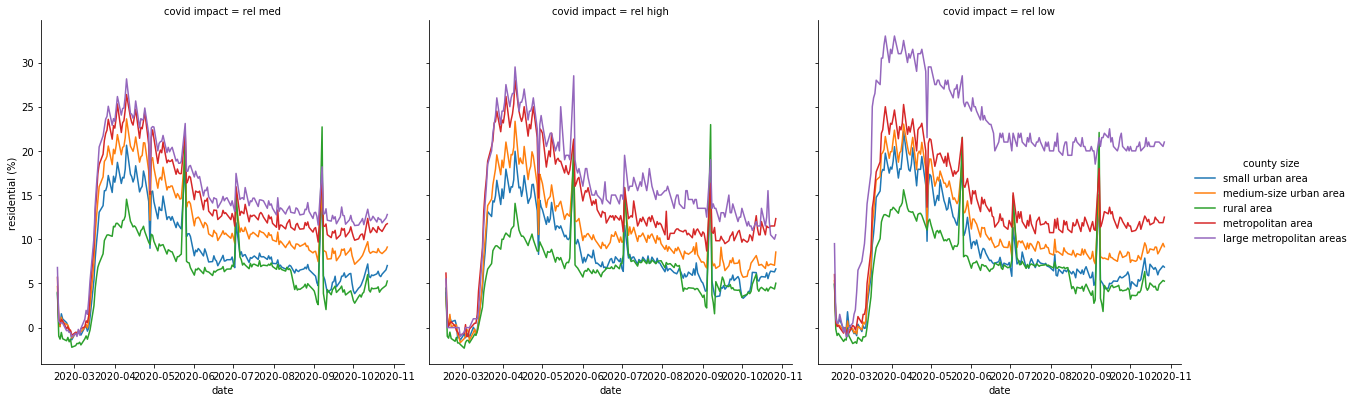

In [15]:
sns.relplot(
    data=df[df["weekend"] == 0], x = "date",
    y = "residential (%)", col="covid impact",
    hue="county size", ci = None,
    kind="line", height = 5.5, col_wrap = 3
)

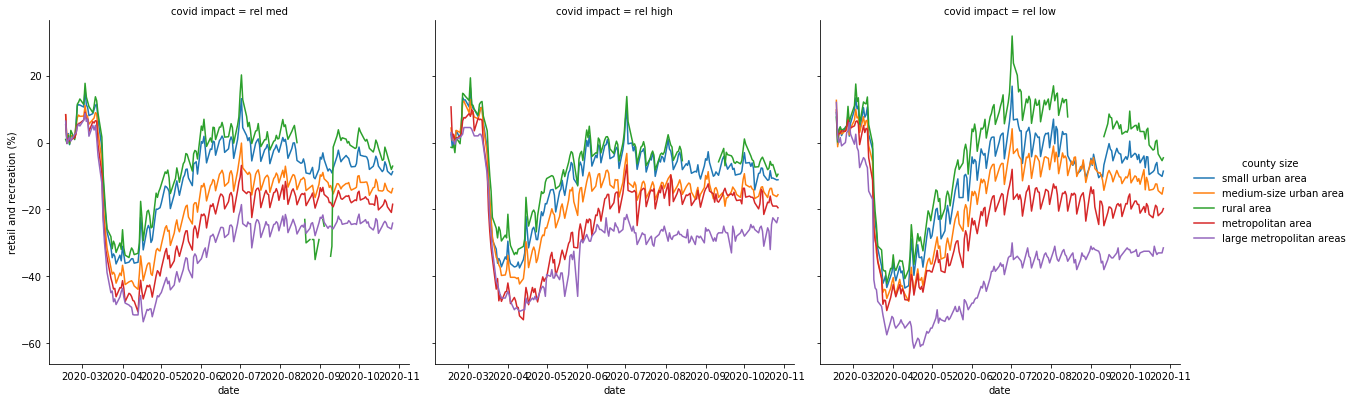

In [16]:
sns.relplot(
    data=df[df["weekend"] == 0], x = "date",
    y = "retail and recreation (%)", col="covid impact",
    hue="county size", ci = None,
    kind="line", height = 5.5, col_wrap = 3
)

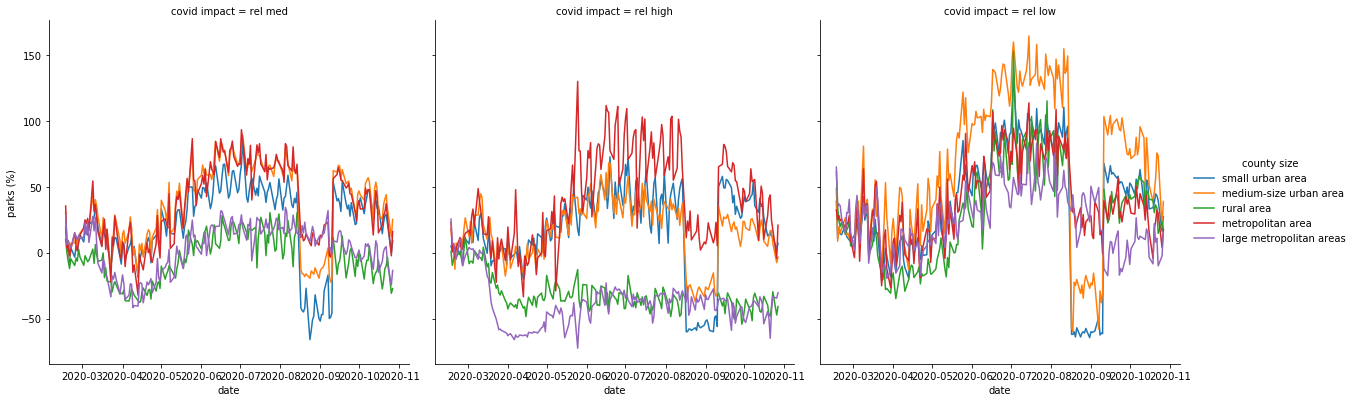

In [17]:
sns.relplot(
    data=df[df["weekend"] == 0], x = "date",
    y = "parks (%)", col="covid impact",
    hue="county size", ci = None,
    kind="line", height = 5.5, col_wrap = 3
)

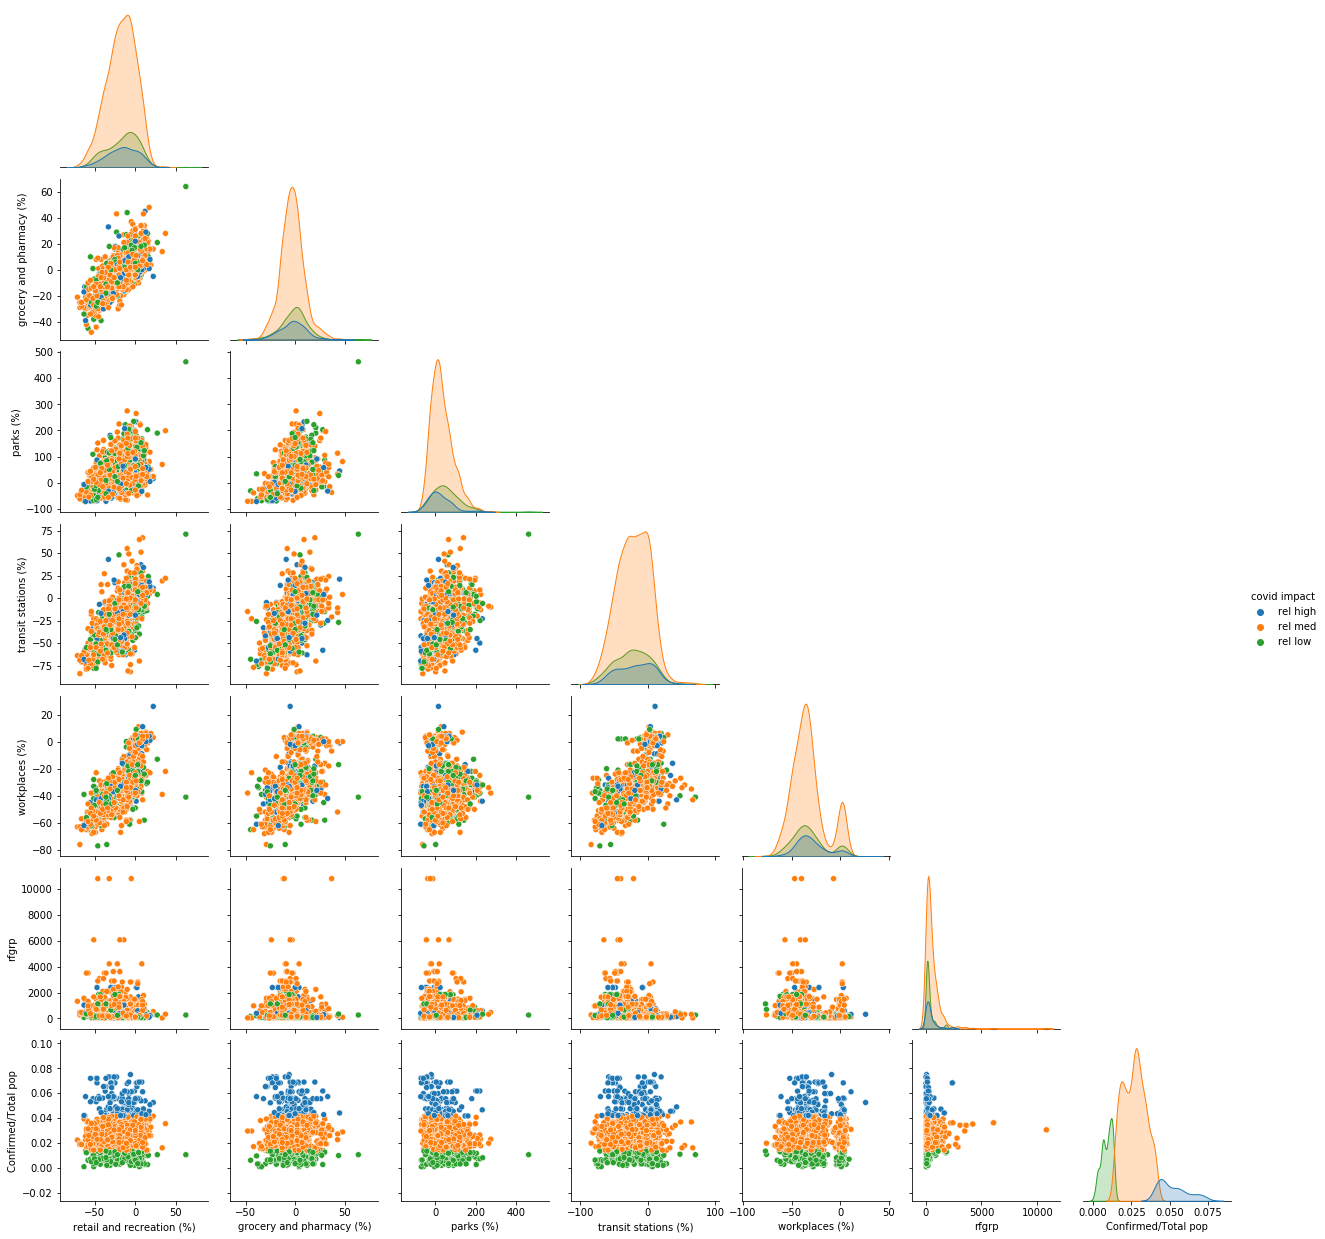

In [18]:
cols = ["retail and recreation (%)",
        "grocery and pharmacy (%)",
        "parks (%)",
        "transit stations (%)",
        "workplaces (%)",
        "rfgrp",
        "Confirmed/Total pop", "covid impact"]
sns.pairplot(df[df["weekend"] == 0][cols].dropna().sample(1500), hue = "covid impact", corner = True)